3
3


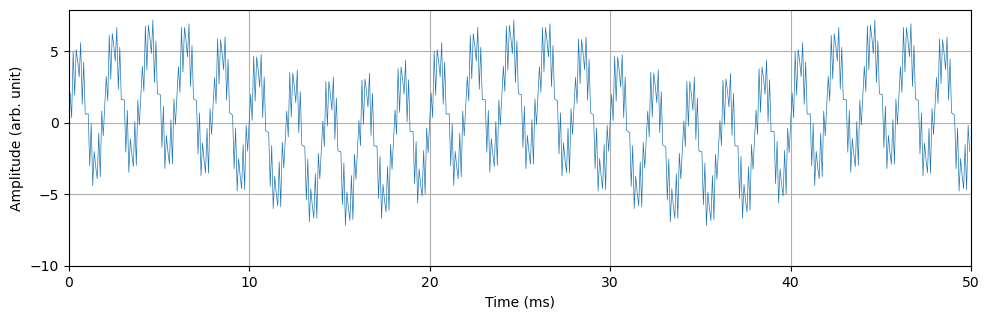

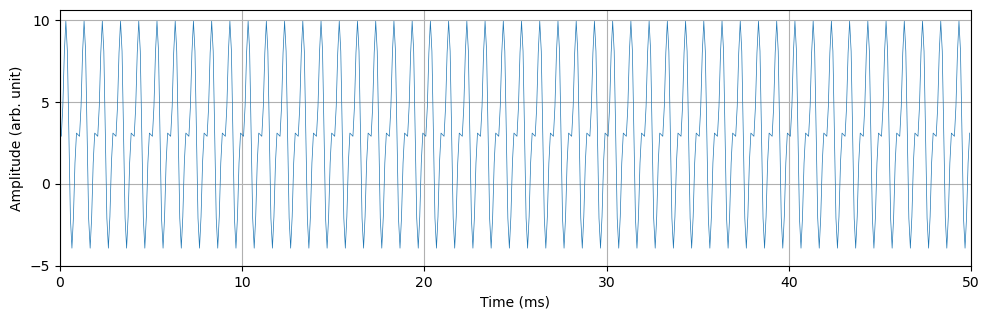

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.size': 12}) 

def generate_signal(frequencies, amplitudes, offset, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False) #生成等间隔分布的点
    signal = offset
    for i in range(len(frequencies)):
        signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)
        
    t = [t * 1000 for t in t] #输出的x轴从0-0.05变成0-50
    return t, signal


# Parameters for the first signal
frequencies1 = [50, 500, 5000]
amplitudes1 = [2, 4, 2]
offset1 = 0
duration1 = 1000
sample_rate1 = 12000

# Generate and plot the first signal
t1, signal1 = generate_signal(frequencies1, amplitudes1, offset1, duration1, sample_rate1)
plt.figure(figsize=(10, 6)) #英寸为单位，指定宽度和高度
plt.subplot(2, 1, 1) # 2*1中的第一个图
plt.plot(t1[0:600], signal1[0:600], linewidth=0.5) #只生成前50ms的图即可
# plt.title("")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (arb. unit)")
plt.xlim(0, 50) #不然图像左右还有间隙
plt.yticks(np.arange(-10, 10,5))
plt.tight_layout() #自适应
plt.grid(True) #有网格


# Parameters for the second signal
frequencies2 = [0, 1000, 10000]
amplitudes2 = [3, 5, 3]
offset2 = 3
duration2 = 1000
sample_rate2 = 12000

# Generate and plot the second signal
t2, signal2 = generate_signal(frequencies2, amplitudes2, offset2, duration2, sample_rate2)
plt.figure(figsize=(10, 6)) 
plt.subplot(2, 1, 2)
plt.plot(t2[0:600], signal2[0:600], linewidth=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (arb. unit)")
plt.xlim(0, 50)
plt.yticks(np.arange(-5, 11,5))
plt.tight_layout()
plt.grid(True)
plt.show()

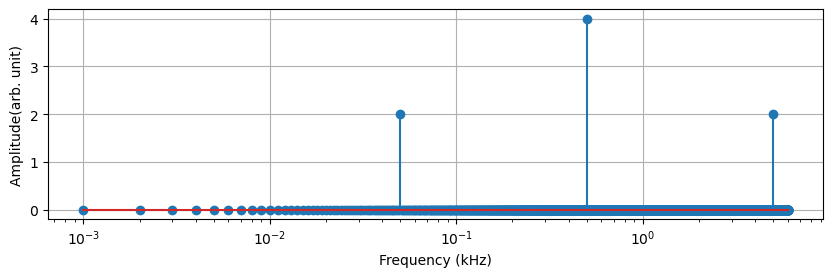

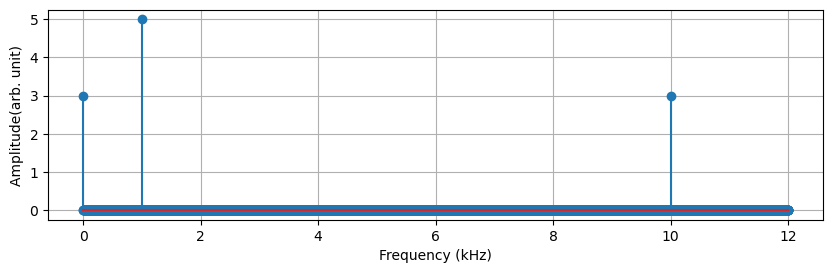

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(frequencies, amplitudes, offset, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = offset
    for i in range(len(frequencies)):
        signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)
    
    t = [t * 1000 for t in t] #输出的x轴从0-0.05变成0-50,从s为单位变成ms为单位，数量级乘以1000
    return t, signal

# Parameters for the first signal
frequencies1 = [50, 500, 5000]
# frequencies1 = [0.050, 0.0500, 0.5000]
amplitudes1 = [2, 4, 2]
offset1 = 0
duration1 = 1
sample_rate1 = 12000

# Generate the first signal
t1, signal1 = generate_signal(frequencies1, amplitudes1, offset1, duration1, sample_rate1)
N1 = len(signal1)
# Compute the FFT and get the frequency spectrum
fft1 = np.fft.fft(signal1) #时域信号转换为频域信号，fft傅立叶变换
frequencies1_fft = np.fft.fftfreq(N1, 1/sample_rate1) # 频率数组（采样点数量，间隔）
amplitudes1_fft = np.abs(fft1) # 幅度谱
# Matlab里用FFT的话得出来的spectrum是需要经过处理的 要取一半（因为得出来的是正负频率对称的）再✖️2 
positive = frequencies1_fft > 0
# positive_frequencies1 = positive_frequencies[:N1//2]
positive_frequencies1 = frequencies1_fft[positive]
# one_sided_amplitude_spectrum1 = 2.0/N1 * np.abs(fft1[:N1//2])  # 计算单边幅度谱 y
one_sided_amplitude_spectrum1 = 2.0/N1 * np.abs(fft1[positive])

# Plot the spectrum of the first signal
plt.figure(figsize=(10, 6)) #英寸为单位，指定宽度和高度
plt.subplot(2, 1, 1) # 2*1中的第一个图
# plt.semilogx(frequencies1_fft, amplitudes1_fft) #对数画图 
plt.stem(0.001*positive_frequencies1, one_sided_amplitude_spectrum1) #对数画图 
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude(arb. unit)")
plt.grid(True)
plt.xscale('log') # x的值转为对数
plt.show()


# Parameters for the second signal
frequencies2 = [0, 1000, 10000]
amplitudes2 = [3, 5, 3]
offset2 = 3
duration2 = 1
# sample_rate2 = 12000
sample_rate2 = 24000

t2, signal2 = generate_signal(frequencies2, amplitudes2, offset2, duration2, sample_rate2)
N2 = len(signal2)
fft2 = np.fft.fft(signal2) #时域信号转换为频域信号，fft傅立叶变换
frequencies2 = np.fft.fftfreq(N2, 1/sample_rate2) # 频率数组（采样点数量，间隔）
amplitudes2 = np.abs(fft2) # 幅度谱

positive = frequencies2 > 0
positive_frequencies2 = frequencies2[positive]
one_sided_amplitude_spectrum2 = 2.0/N2 * np.abs(fft2[positive])
one_sided_amplitude_spectrum2[0] = np.abs(fft2[0]) / N2

plt.figure(figsize=(10, 6)) #英寸为单位，指定宽度和高度
plt.subplot(2, 1, 2) # 2*1中的第一个图
plt.stem(0.001*positive_frequencies2, one_sided_amplitude_spectrum2)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude(arb. unit)")
plt.grid(True)

# ?为什么得不到10的-1，-2，-3侧的图  Hz变为kHz
# ？为什么是2kHz，设置的是10Hz呀  采样率过低

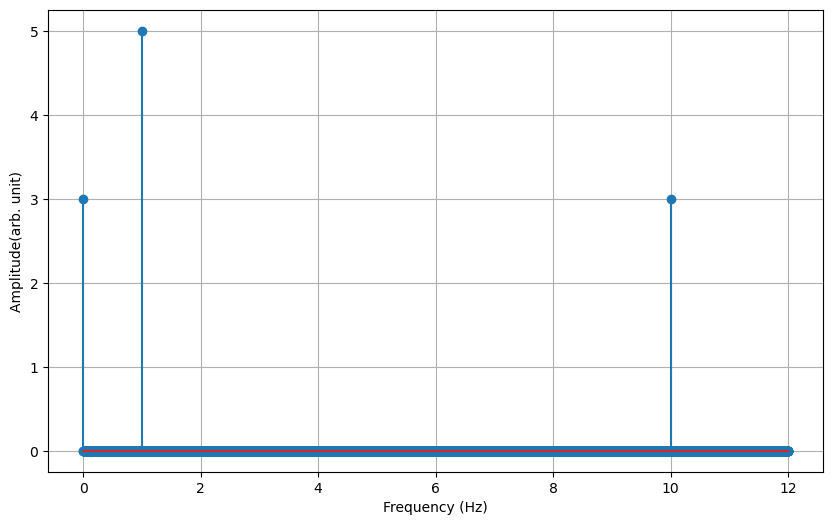

In [75]:
# Parameters for the second signal
frequencies2 = [0, 1000, 10000]
amplitudes2 = [3, 5, 3]
offset2 = 3
duration2 = 1
# sample_rate2 = 12000
sample_rate2 = 24000


# Generate the first signal
t2, signal2 = generate_signal(frequencies2, amplitudes2, offset2, duration2, sample_rate2)
N2 = len(signal2)
# Compute the FFT and get the frequency spectrum
fft2 = np.fft.fft(signal2) #时域信号转换为频域信号，fft傅立叶变换
frequencies2 = np.fft.fftfreq(N2, 1/sample_rate2) # 频率数组（采样点数量，间隔）
amplitudes2 = np.abs(fft2) # 幅度谱
# Matlab里用FFT的话得出来的spectrum是需要经过处理的 要取一半（因为得出来的是正负频率对称的）再✖️2 

# frequencies1 = np.fft.fftfreq(N1, 1/sample_rate1) 
positive = frequencies2 > 0
# positive_frequencies1 = positive_frequencies[:N1//2]
positive_frequencies2 = frequencies2[positive]
# one_sided_amplitude_spectrum1 = 2.0/N1 * np.abs(fft1[:N1//2])  # 计算单边幅度谱 y
one_sided_amplitude_spectrum2 = 2.0/N2 * np.abs(fft2[positive])
one_sided_amplitude_spectrum2[0] = np.abs(fft2[0]) / N2


# Plot the spectrum of the first signal
plt.figure(figsize=(10, 6)) #英寸为单位，指定宽度和高度
# plt.subplot(2, 1, 2) # 2*1中的第一个图
# plt.semilogx(frequencies1_fft, amplitudes1_fft) #对数画图 
plt.stem(0.001*positive_frequencies2, one_sided_amplitude_spectrum2)
# plt.plot(positive_frequencies2, one_sided_amplitude_spectrum2) #对数画图 
# plt.semilogx(frequencies[positive], normalized_fft_values)
# plt.xlim(0, 6000) #不然图像左右还有间隙
# plt.ylim(0) 
# plt.tight_layout() #自适应
# plt.title("Spectrum of Signal 2 (logarithmic frequency scale)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude(arb. unit)")
plt.grid(True)
# # # Generate the second signal
# t2, signal2 = generate_signal(frequencies2, amplitudes2, offset2, duration2, sample_rate2)
# fft2 = np.fft.fft(signal2) #时域信号转换为频域信号，fft傅立叶变换

# # Compute the FFT and get the frequency spectrum
# fft2 = np.fft.fft(signal2)
# frequencies2_fft = np.fft.fftfreq(len(fft2), 1/sample_rate2)
# amplitudes2_fft = np.abs(fft2)

# # Plot the spectrum of the second signal
# plt.figure()
# # plt.semilogx(frequencies2_fft, amplitudes2_fft)
# plt.plot(frequencies2_fft, amplitudes2_fft)
# plt.title("Spectrum of Signal 2 (logarithmic frequency scale)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Amplitude")
# plt.grid(True)

# plt.show()

# ?为什么得不到10的-1，-2，-3侧的图啊
# ？为什么是2kHz，设置的是10Hz呀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(frequencies, amplitudes, offset, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = offset
    for i in range(len(frequencies)):
        signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)
    
    t = [t * 1000 for t in t] #输出的x轴从0-0.05变成0-50,从s为单位变成ms为单位，数量级乘以1000
    return t, signal

# Parameters for the first signal
frequencies1 = [50, 500, 5000]
# frequencies1 = [0.050, 0.0500, 0.5000]
amplitudes1 = [2, 4, 2]
offset1 = 0
duration1 = 1
sample_rate1 = 12000

# Generate the first signal
t1, signal1 = generate_signal(frequencies1, amplitudes1, offset1, duration1, sample_rate1)
N1 = len(signal1)
# Compute the FFT and get the frequency spectrum
fft1 = np.fft.fft(signal1) #时域信号转换为频域信号，fft傅立叶变换
frequencies1_fft = np.fft.fftfreq(N1, 1/sample_rate1) # 频率数组（采样点数量，间隔）
amplitudes1_fft = np.abs(fft1) # 幅度谱
# Matlab里用FFT的话得出来的spectrum是需要经过处理的 要取一半（因为得出来的是正负频率对称的）再✖️2 
positive = frequencies1_fft > 0
positive_frequencies1 = frequencies1_fft[positive]
one_sided_amplitude_spectrum1 = 2.0/N1 * np.abs(fft1[positive])

# Plot the spectrum of the first signal
plt.figure(figsize=(10, 6)) #英寸为单位，指定宽度和高度
plt.stem(0.001*positive_frequencies1, one_sided_amplitude_spectrum1) #对数画图 
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude(arb. unit)")
plt.grid(True)
plt.xscale('log') # x的值转为对数
plt.show()